# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

### Keras Upgrade

In [ ]:
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.6 MB/s eta 0:00:00


## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [ ]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

### Data Loading

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 5801
다음 그림은 Truck 입니다.


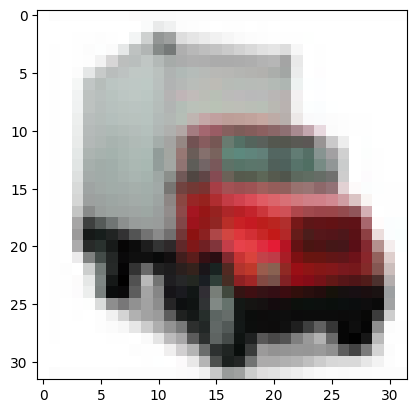

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

* Choose 1. 한꺼번에 Standardization 적용

In [ ]:
mean_n, std_n = train_x.mean(), train_x.std()
mean_n, std_n

(120.70756512369792, 64.1500758911213)

In [ ]:
train_x_ss = (train_x - mean_n) / std_n
test_x_ss = (test_x - mean_n) / std_n

In [ ]:
train_x_ss.mean(), train_x_ss.std()

(-2.5247951877342226e-17, 1.0000000000000022)

* Choose 2. 채널별로 Standardization 적용

In [ ]:
train_x.shape

(50000, 32, 32, 3)

In [ ]:
tr_r_mean, tr_r_std = train_x[:,:,:,0].mean(), train_x[:,:,:,0].std()
tr_g_mean, tr_g_std = train_x[:,:,:,1].mean(), train_x[:,:,:,1].std()
tr_b_mean, tr_b_std = train_x[:,:,:,2].mean(), train_x[:,:,:,2].std()

In [ ]:
(tr_r_mean, tr_r_std), (tr_g_mean, tr_g_std), (tr_b_mean, tr_b_std)

((125.306918046875, 62.993219278136884),
 (122.950394140625, 62.08870764001421),
 (113.86538318359375, 66.70489964063091))

In [ ]:
train_x_r = (train_x[:,:,:,0] - tr_r_mean) / tr_r_std
train_x_g = (train_x[:,:,:,1] - tr_g_mean) / tr_g_std
train_x_b = (train_x[:,:,:,2] - tr_b_mean) / tr_b_std

In [ ]:
print( train_x_r.mean(), train_x_r.std() )
print( train_x_g.mean(), train_x_g.std() )
print( train_x_b.mean(), train_x_b.std() )

4.4138026566997726e-17 1.0
1.0193623722898337e-16 0.9999999999999967
1.8971491044794675e-17 1.0000000000000013


In [ ]:
train_x_ss2 = np.stack((train_x_r, train_x_g, train_x_b), axis=3)

In [ ]:
train_x_ss2.shape

(50000, 32, 32, 3)

In [ ]:
test_x_r = (test_x[:,:,:,0] - tr_r_mean) / tr_r_std
test_x_g = (test_x[:,:,:,1] - tr_g_mean) / tr_g_std
test_x_b = (test_x[:,:,:,2] - tr_b_mean) / tr_b_std

In [ ]:
test_x_ss2 = np.stack((test_x_r, test_x_g, test_x_b), axis=3)

In [ ]:
test_x_ss2.shape

(10000, 32, 32, 3)

### Y : One-Hot Encoding

In [ ]:
from keras.utils import to_categorical

In [ ]:
classes_n = len(np.unique(train_y))
classes_n

10

In [ ]:
train_y_hot = to_categorical(train_y, classes_n)
test_y_hot = to_categorical(test_y, classes_n)

In [ ]:
train_x_ss.shape, train_y_hot.shape

((50000, 32, 32, 3), (50000, 10))

### 코드를 완성해주세요 : FC 구조

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---


In [ ]:
import keras

from keras.utils import clear_session, plot_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

#### Sequential API

In [ ]:
## 1. 세션 클리어
clear_session()

## 2. 모델 선언
model_fc = Sequential()

## 3. 레이어 조립
model_fc.add( Input(shape=(32,32,3)) )
model_fc.add( Flatten() )
model_fc.add( Dense(256, activation='relu') )
model_fc.add( Dense(256, activation='relu') )
model_fc.add( BatchNormalization() )
model_fc.add( Dropout(0.25) )
model_fc.add( Dense(128, activation='relu') )
model_fc.add( Dense(128, activation='relu') )
model_fc.add( BatchNormalization() )
model_fc.add( Dropout(0.25) )
model_fc.add( Dense(64, activation='relu') )
model_fc.add( Dense(64, activation='relu') )
model_fc.add( BatchNormalization() )
model_fc.add( Dropout(0.25) )
model_fc.add( Dense(10, activation='softmax') )

## 요약
model_fc.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 916,746 (3.50 MB)

 Trainable params: 915,850 (3.49 MB)

 Non-trainable params: 896 (3.50 KB)

#### Functional API

In [ ]:
## 1. 세션 클리어
clear_session()

## 2. 레이어 조립
il = Input(shape=(32,32,3))
hl = Flatten()(il)
hl = Dense(256, activation='relu')(hl)
hl = Dense(256, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
hl = Dense(128, activation='relu')(hl)
hl = Dense(128, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
hl = Dense(64, activation='relu')(hl)
hl = Dense(64, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
ol = Dense(10, activation='softmax')(hl)

## 3. 모델 시작 끝 지정
model_fc = Model(il, ol)

## 요약
model_fc.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 916,746 (3.50 MB)

 Trainable params: 915,850 (3.49 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model_fc.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy']
                 )

#### 모델 학습

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=4,
                   verbose=1,
                   restore_best_weights=True,
                   )

In [ ]:
history = model_fc.fit(train_x_ss, train_y_hot, validation_split=0.2,
                       epochs=1000, verbose=1,
                       callbacks=[es]
                       )

Epoch 1/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2316 - loss: 2.2308 - val_accuracy: 0.3942 - val_loss: 1.6886
Epoch 2/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.3813 - loss: 1.7303 - val_accuracy: 0.4344 - val_loss: 1.5793
Epoch 3/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4373 - loss: 1.5913 - val_accuracy: 0.4454 - val_loss: 1.5347
Epoch 4/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4628 - loss: 1.5188 - val_accuracy: 0.4749 - val_loss: 1.4741
Epoch 5/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4865 - loss: 1.4515 - val_accuracy: 0.4963 - val_loss: 1.4137
Epoch 6/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5112 - loss: 1.3944 - val_accuracy: 0.4997 - val_loss: 1.4189
Epoch 7/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5272 - loss: 1.3381 - val_accuracy: 0.5091 - val_loss: 1.3767
Epoch 8/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5429

### 코드를 완성해주세요 : CNN 구조

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [ ]:
import keras

from keras.utils import clear_session, plot_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPool2D

from keras.callbacks import EarlyStopping

#### Sequential API

In [ ]:
## 1. 세션 클리어
clear_session()

## 2. 모델 선언
model_cnn = Sequential()

## 3. 레이어 조립
# 인풋레이어
model_cnn.add( Input(shape=(32,32,3)) )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model_cnn.add( Conv2D(filters=32,        # 새롭게 제작하려는 feature map의 수 (서로 다른 filter의 수)
                      kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈
                      strides=(1,1),     # Conv2D filter의 이동 보폭
                      padding='same',    # 앞전 feature map 사이즈 유지 및 외곽 정보를 더 반영
                      activation='relu',
                      ) )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model_cnn.add( Conv2D(filters=32,        # 새롭게 제작하려는 feature map의 수 (서로 다른 filter의 수)
                      kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈
                      strides=(1,1),     # Conv2D filter의 이동 보폭
                      padding='same',    # 앞전 feature map 사이즈 유지 및 외곽 정보를 더 반영
                      activation='relu',
                      ) )
# BatchNormalization
model_cnn.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model_cnn.add( MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                         strides=(2,2),   # pooling filter의 이동 보폭
                         ) )
# DropOut : 25% 비활성화
model_cnn.add( Dropout(0.25) )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model_cnn.add( Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수 (서로 다른 filter의 수)
                      kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈
                      strides=(1,1),     # Conv2D filter의 이동 보폭
                      padding='same',    # 앞전 feature map 사이즈 유지 및 외곽 정보를 더 반영
                      activation='relu',
                      ) )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model_cnn.add( Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수 (서로 다른 filter의 수)
                      kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈
                      strides=(1,1),     # Conv2D filter의 이동 보폭
                      padding='same',    # 앞전 feature map 사이즈 유지 및 외곽 정보를 더 반영
                      activation='relu',
                      ) )
# BatchNormalization
model_cnn.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model_cnn.add( MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                         strides=(2,2),   # pooling filter의 이동 보폭
                         ) )
# DropOut : 25% 비활성화
model_cnn.add( Dropout(0.25) )
# Flatten( )
model_cnn.add( Flatten() )
# Fully Connected Layer : 노드 1024개
model_cnn.add( Dense(1024, activation='relu') )
# BatchNormalization
model_cnn.add( BatchNormalization() )
# DropOut : 35% 비활성화
model_cnn.add( Dropout(0.35) )
# 아웃풋레이어
model_cnn.add( Dense(10, activation='softmax') )

## 요약
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,626 (16.31 MB)

 Trainable params: 4,273,386 (16.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

#### Functional API

In [ ]:
## 1. 세션 클리어
clear_session()

## 2. 레이어 사슬처럼 엮기
# 인풋레이어
il = Input(shape=(32,32,3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, 3, 1, 'same', activation='relu')(il)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, 3, 1, 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(2)(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, 3, 1, 'same', activation='relu')(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, 3, 1, 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(2)(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(10, activation='softmax')(hl)

## 3. 모델의 시작과 끝 지정
model_cnn = Model(il, ol)

## 요약
model_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,626 (16.31 MB)

 Trainable params: 4,273,386 (16.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

#### 모델 학습

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )

In [ ]:
es = EarlyStopping(monitor='val_loss',        ## 얼리스토핑 적용할 관측 지표
                   min_delta=0,               ## 임계값. 관측 지표가 임계값 이상으로 변해야 개선으로 인정
                   patience=4,                ## 성능 개선 발생하지 않을 때 몇 epochs 더 지켜볼 것인가
                   verbose=1,
                   restore_best_weights=True, ## 얼리스토핑이 적용되었을 때, 최적 가중치를 가진 epoch로 복구
                   )

In [ ]:
history = model_cnn.fit(train_x_ss, train_y_hot, validation_split=0.2,
                        epochs=1000, verbose=1,
                        callbacks=[es]
                        )

Epoch 1/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4024 - loss: 1.9435 - val_accuracy: 0.5007 - val_loss: 1.6788
Epoch 2/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5964 - loss: 1.1581 - val_accuracy: 0.6764 - val_loss: 0.9295
Epoch 3/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6747 - loss: 0.9334 - val_accuracy: 0.6542 - val_loss: 1.0425
Epoch 4/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7181 - loss: 0.8064 - val_accuracy: 0.7023 - val_loss: 0.9064
Epoch 5/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7407 - loss: 0.7416 - val_accuracy: 0.7272 - val_loss: 0.7899
Epoch 6/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7744 - loss: 0.6452 - val_accuracy: 0.7179 - val_loss: 0.8230
Epoch 7/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7917 - loss: 0.5977 - val_accuracy: 0.7373 - val_loss: 0.7831
Epoch 8/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8210

### 성능 평가

In [ ]:
performance_test = model_cnn.evaluate(test_x_ss, test_y_hot)

print( f'Test Loss : {performance_test[0]:.6f}, Test Accuracy : {performance_test[1]*100:.3f}%' )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.6276
Test Loss : 0.638725, Test Accuracy : 78.840%


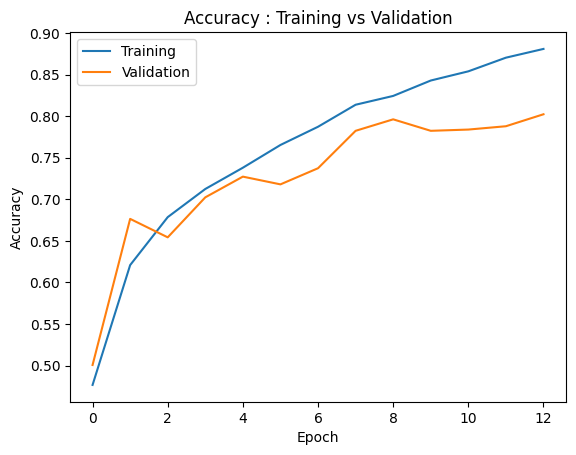

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

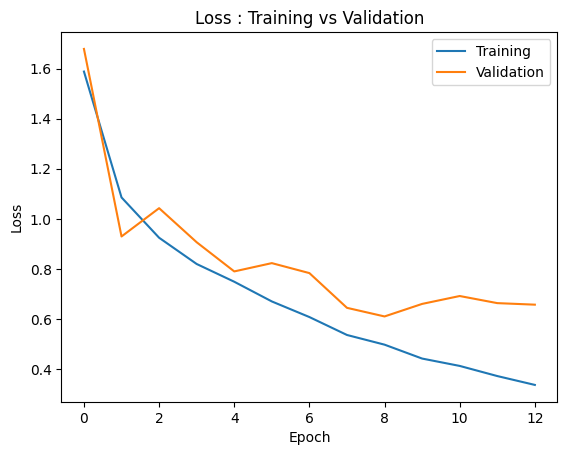

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
# 원핫 인코딩 해제
train_y = train_y_hot.argmax(axis=1)
test_y = test_y_hot.argmax(axis=1)

In [ ]:
pred_train = model_cnn.predict(train_x_ss)
pred_test = model_cnn.predict(test_x_ss)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN
트레이닝 정확도 : 90.40%
테스트 정확도 : 78.84%


id = 6500
다음 그림은 Horse 입니다.
모델의 예측 : Horse
모델의 카테고리별 확률 : 
{'Airplane': 5.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 2.0, 'Dog': 1.0, 'Frog': 0.0, 'Horse': 69.0, 'Ship': 3.0, 'Truck': 16.0}
정답입니다


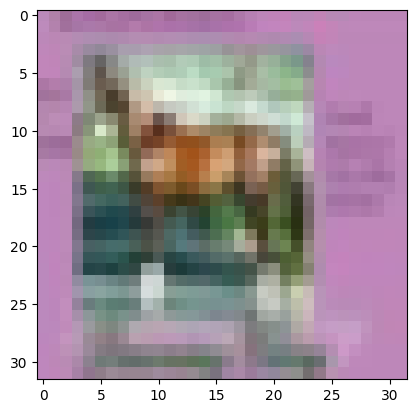

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 6370
다음 그림은 Frog 입니다.
모델의 예측 : Dog
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 1.0, 'Cat': 23.0, 'Deer': 0.0, 'Dog': 75.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


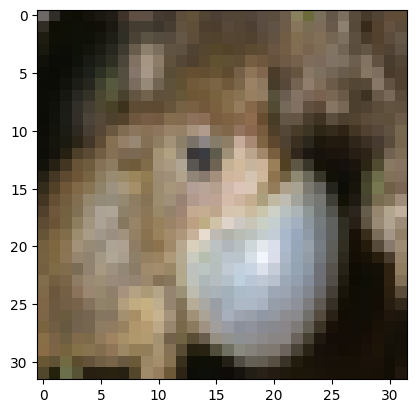

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()